# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analyzing data associated with the patients who don’t show up in their medical appointments.

This dataset collects information from 100k medical appointments in Brazil associated with 14 Variables (characteristics), the most important one if the patient show-up or no-show to the appointment.

1- **PatientId:** Identification of a patient.

2- **AppointmentID:** Identification of each appointment.

3- **Gender:** Male or Female.

4- **AppointmentDay:** The day of the actual appointment when they have to visit the doctor

5- **ScheduledDay:** The day someone called or registered the appointment, this is before appointment of course.

6- **Age:** How old is the patient.

7- **Neighbourhood:** Indicates the location of the hospital.

8- **Scholarship:** Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. (1 or 0)

9- **Hipertension:** The patient has high blood pressure or not. (1 or 0)

10- **Diabetes:** The patient has diabetes or not. (1 or 0)

11- **Alcoholism:** The patient drinks alcohol or not. (1 or 0)

12- **Handcap:** The patient has disabilities or not. (1 or 0)

13- **SMS_received:** 1 or more messages sent to the patient. (1 or 0)

14- **No-show:** The person Showed up or not (No if showed and Yes if not showed)




### Question(s) for Analysis

1- What is the percentage of patients who showed up?

2- Who showed up more, men or women?

3- Do people with diseases (Hypertension & diabetes) show more?

4- What is the relation between showing up and alcoholic patients?

5- Do disabled people show up less?

6- Does sms messages recieved make patients show up more?

7- Does the hospital place affect showing up?

8- Is there a relation between waiting days and patients showing up?

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [162]:
# Upgrade pandas to use dataframe.explode() function.  
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling and Cleaning

In [106]:
# Load the data
df = pd.read_csv('noshowappointments.csv')

In [107]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Some cols have wrong spelling**

In [108]:
# rename cols with wrong spelling
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

**no_show col is a little bit confusing so we change to show**

In [109]:
# change col name
df.rename(columns={'No-show':'show'}, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'show'],
      dtype='object')

In [110]:
df['show'].value_counts()

No     88208
Yes    22319
Name: show, dtype: int64

**Reverse the outputs to match the col meaning**

In [111]:
# reverse the output to match meaning of the new column name
df['show'].replace({'No': 'yes', 'Yes': 'no'}, inplace = True)

In [112]:
# check the shape of the dataset
df.shape

(110527, 14)

In [113]:
df['show'].value_counts()

yes    88208
no     22319
Name: show, dtype: int64

**Checking for data types and missing values**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
show              110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Fortunately there is no missing values, but ScheduledDay & AppointmentDay cols have wrong type**

In [115]:
# changing ScheduledDay & AppointmentDay cols to date and time format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

**Let's make a new column called waiting days to calculate the number of days the patient has to wait for his appointment**

In [116]:
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [117]:
df.WaitingDays.unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145, 122])

We see that there is negative values which have to be removed

In [118]:
# count number of rows which have WaitingDays < 0
df.query('WaitingDays < 0').show.count()

38568

looks like there large number of rows which have negative values, dropping them will affect our analysis, so we will take it into consideration

In [119]:
# See changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
show              110527 non-null object
WaitingDays       110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 12.6+ MB


In [120]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingDays
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


From describtion, we see some issues there, There is a row with age = -1 and Handicap has more than two values 

**Removing Rows with age < 0**

In [121]:
# selecting all rows with age < 0
neg_age = df.query('Age < 0')
neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,WaitingDays
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,yes,-1


In [122]:
# drop negative_age rows
df.drop(neg_age.index, axis = 0, inplace = True)
neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,WaitingDays
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,yes,-1


**Remove extra hanicap values**

In [123]:
# check all Handicap values
df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [124]:
# Removing rows with values(2,3,4)
df.drop(df.query('Handicap > 1').index, axis = 0, inplace = True)

In [125]:
# check again
df['Handicap'].value_counts()

0    108285
1      2042
Name: Handicap, dtype: int64

**Checking for duplicates, We can't check by id as a patient can have several appointments,but we check by the appointment ID**

In [126]:
df[df.duplicated('AppointmentID')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,WaitingDays


There is no duplicates

In [127]:
# check again
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingDays
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,9.186971
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,15.257836
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


**There are cols that we don't need in analysis**

In [128]:
# Remove unneeded cols
unneeded_cols = ['PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay']
df.drop(unneeded_cols, axis = 1, inplace = True)
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'show',
       'WaitingDays'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How many Patients showed up?)

In [129]:
# get number of patients who showed up and who didn't show
df.show.value_counts()

yes    88049
no     22278
Name: show, dtype: int64

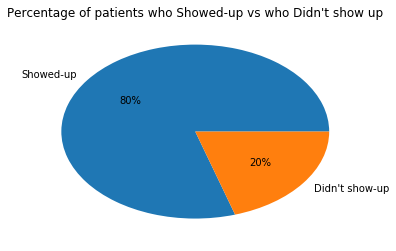

In [130]:
# plot percentage of patients who showed vs didn't show
plt.pie(df.show.value_counts(), labels = ["Showed-up","Didn't show-up"], autopct='%1.0f%%');
plt.title("Percentage of patients who Showed-up vs who Didn't show up");

We can see that 80% of patients showed up.

### Research Question 2 (Who shows up more, men or women?)

First, Let's see how many males & females are there


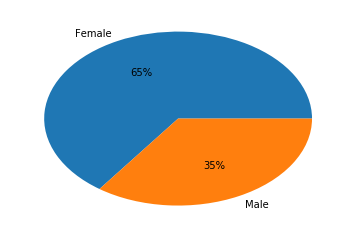

In [131]:
# get number of males and females
num_female = df['Gender'].value_counts()[0]
num_male = df['Gender'].value_counts()[1]

# plot a pie chart

plt.pie([num_female,num_male], labels=['Female','Male'], autopct='%.0f%%');

Female is the greater proportion, woman takes way more care of they health in comparison to man. We will take this into consideration during the analysis.

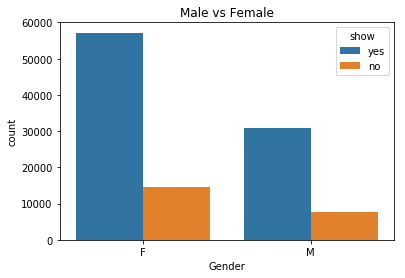

In [132]:
sns.countplot(x=df['Gender'], hue=df['show']).set(title='Male vs Female');

We can see that females are most likely to show up.

### Research Question 3  (Do people with diseases (Hypertension & Diabetes) show more?)

**To prevent code repetetion I will create a function to count the Avg**

In [133]:
def count_avg (col1_name, col2_name = ''):
        
    '''
    This function takes col name, where cols values are bool,
    & return Avg number of patients who have the value == True,
    & Avg number of patients who have values == False
    
    parameters: 
        col1_name: The column we will get its average
        col2_name: Additional column if we want to calculate
                   with respect two two colunms (initially = '')
    output:
        avg_yes: Avg number of people who have col_name values = 1
        avg_no: Avg number of people who have col_name values = 0
    
    '''
    
    # if col2_name is not provided
    if col2_name == '':
        col2_name = col1_name
    
    # patients whose col values = 1
    patients_yes = df.query(col1_name + '==1 &'+col2_name+ '== 1& show == "yes"').show.count()
    total_patients_yes = df.query(col1_name + '==1 &'+col2_name+ '== 1').show.count()
    avg_yes = float(patients_yes/total_patients_yes)
    
    # patients whose col values = 0
    patients_no = df.query(col1_name + '==0 &'+col2_name+ '== 0& show == "yes"').show.count()
    total_patients_no = df.query(col1_name + '==0 &'+col2_name+ '== 0').show.count()
    avg_no = float(patients_no/total_patients_no)
    
    return avg_yes, avg_no

In [134]:
# calculate avg number of patients who have diseases vs who don't have (who showed)
avg_diseased, avg_non_diseased = count_avg("Hypertension", "Diabetes")

avg_diseased, avg_non_diseased

(0.8241775294847921, 0.7907062130686707)

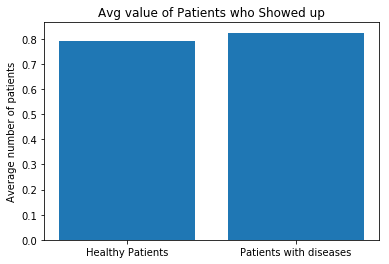

In [135]:
#plot
plt.bar(['Patients with diseases','Healthy Patients'],[avg_diseased,avg_non_diseased]);
plt.title('Avg value of Patients who Showed up');
plt.ylabel('Average number of patients');

We can conclude that there is no relation between patients with diseases and showing up.

### Research Question 4  (How Alcohol affects showing up?)

In [136]:
# calculate avg number of patients who drink alcohol vs who don't (who showed)
avg_alcoholic, avg_non_alcoholic = count_avg("Alcoholism")

avg_alcoholic, avg_non_alcoholic

(0.7986276849642004, 0.7980556204720729)

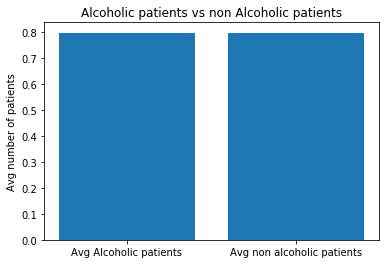

In [137]:
# plot
plt.bar(['Avg Alcoholic patients','Avg non alcoholic patients'],[avg_alcoholic,avg_non_alcoholic]);
plt.title('Alcoholic patients vs non Alcoholic patients');
plt.ylabel('Avg number of patients');

We can see Alcoholism doesn't affect showing up

### Research Question 5  (Does disability affects showing up?)

In [138]:
# calculate avg number of handicapped patients vs non handicapped (who showed)
avg_handicapped, avg_non_handicapped = count_avg("Handicap")

avg_handicapped, avg_non_handicapped

(0.8207639569049952, 0.7976451031998891)

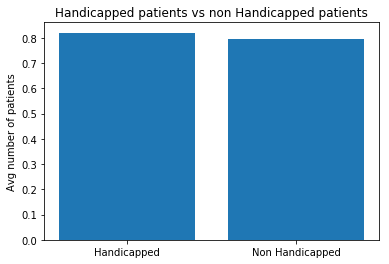

In [139]:
# plot
plt.bar(['Handicapped','Non Handicapped'],[avg_handicapped,avg_non_handicapped]);
plt.title('Handicapped patients vs non Handicapped patients');
plt.ylabel('Avg number of patients');

### Research Question 6  (Does sms-messages make patients show up more?)

In [140]:
df.groupby('SMS_received').show.value_counts()

SMS_received  show
0             yes     62389
              no      12503
1             yes     25660
              no       9775
Name: show, dtype: int64

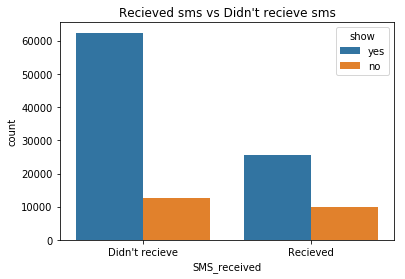

In [141]:
sns.countplot(x=df['SMS_received'], hue=df['show']).set(title="Recieved sms vs Didn't recieve sms");
plt.xticks([0,1],["Didn't recieve", 'Recieved']);

We can see that recieving an sms will not affect showing up

### Research Question 7 (Does the Neighbourhood affect showing up?)

In [142]:
# Get all Neighbourhoods in the dataset
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [143]:
# get number of patients in each Neighbourhood
df.groupby('Neighbourhood')['show'].count()

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2255
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
BELA VISTA             1899
BENTO FERREIRA          855
BOA VISTA               312
BONFIM                 2770
CARATOÍRA              2564
CENTRO                 3330
COMDUSA                 310
CONQUISTA               849
CONSOLAÇÃO             1376
CRUZAMENTO             1398
DA PENHA               2210
DE LOURDES              302
DO CABRAL               558
DO MOSCOSO              411
DO QUADRO               844
ENSEADA DO SUÁ          234
ESTRELINHA              536
FONTE GRANDE            682
FORTE SÃO JOÃO         1889
FRADINHOS               258
GOIABEIRAS              699
GRANDE VITÓRIA         1071
GURIGICA               2018
HORTO                   175
ILHA DAS CAIEIRAS      1067
                       ... 
PARQUE INDUSTRIAL         1
PARQUE MOSCOSO          795
PIEDADE                 452
PONTAL DE CAMBURI        69
PRAIA 

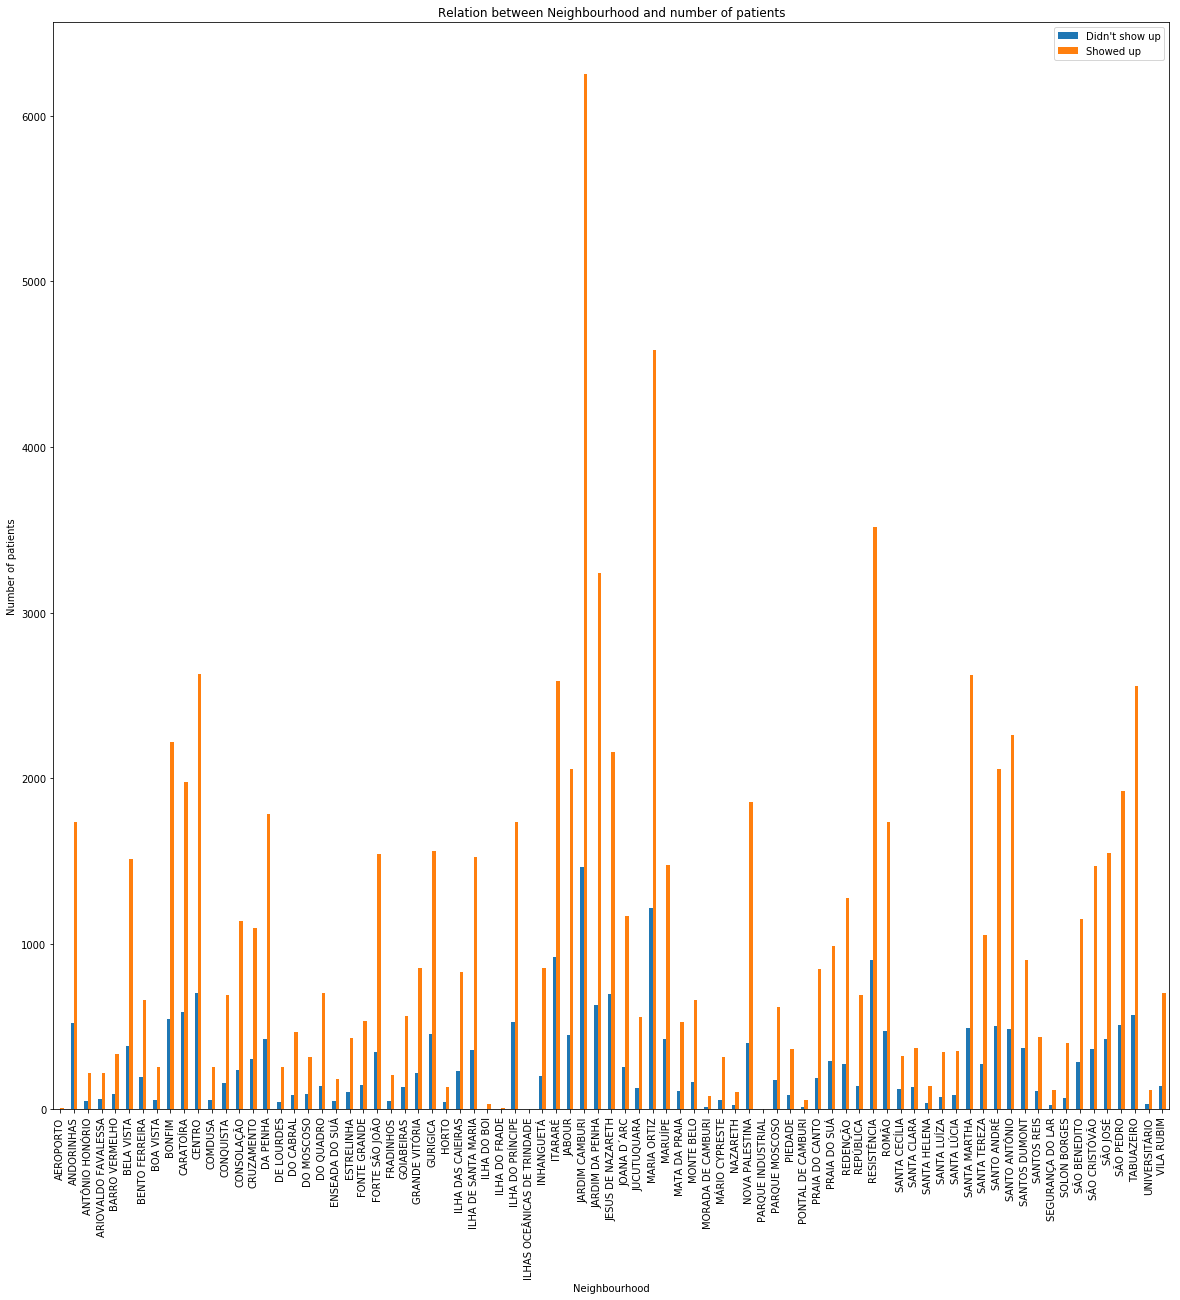

In [144]:
# get number of patients in each Neighbourhood
patients_count = df.groupby(['Neighbourhood','show'])['show'].count()

# plot
patients_count.unstack().plot(kind='bar', title='Relation between Neighbourhood and number of patients', figsize=(20,20));
plt.ylabel('Number of patients')
plt.legend(["Didn't show up","Showed up"]);

We can see that the Neighbourhood doesn't really affect patients showing up.

### Research Question 8  (What is the relation between waiting days and showing up?)

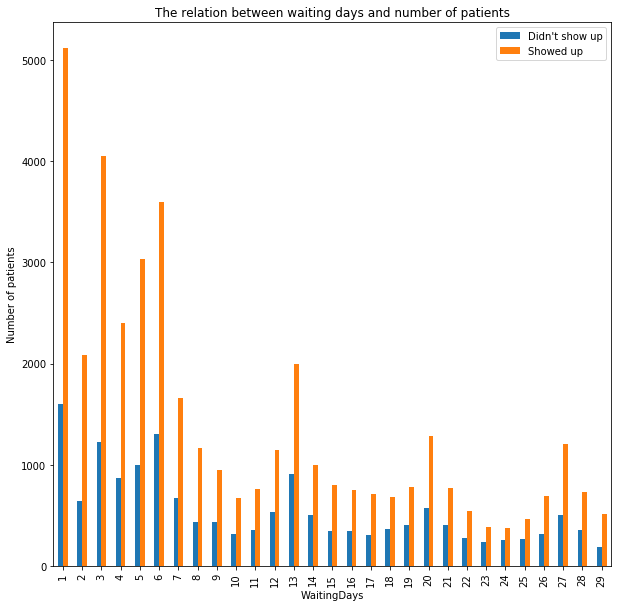

In [145]:
# select portion of waiting days (from 0 to 30 days)
df_selected_days = df.query('WaitingDays < 30 & WaitingDays > 0')

# count number of patients who showed up vs who didn't show up
patients_count = df_selected_days.groupby(['WaitingDays','show'])['show'].count()

# plot
patients_count.unstack().plot(kind = 'bar',title = 'The relation between waiting days and number of patients', figsize = (10,10));
plt.ylabel('Number of patients')
plt.legend(["Didn't show up","Showed up"]);

We can see that by increasing number of waiting days, patients are less likely to show up.

<a id='conclusions'></a>
## Conclusions

**Finaly**, we can conclude the following:

<ul>
    <li>80% of patients showed up, while 20% didn't show up.</li>
    <li>Number of women in the dataset are greater than that of men.</li>
    <li>Women are more likely to attend appointments than men.</li>
    <li>There is no relation between people with diseases (Hypertension and Diabetes) and showing up.</li>
    <li>The is no relation between people who drink alcohol and showing up.</li>
    <li>The more patients wait for their appointments, the less likely to attend.</li>
    <li>The location of the hospital has nothing to do with showing up.</li>
    <li>Recieving an sms message with the appointment won't affect showing up</li>
</ul>

## Limitations

1- There are many rows that have waiting days less than 0 days which means that Appointment day is before Scheduled day.

2- There are spelling errors in the columns.

3- no_show column makes confusion.

In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0